In [1]:
from datetime import datetime, date, time, timedelta
import calendar

from dataprep.eda import plot, plot_correlation, plot_missing
import pandas as pd  ## Import the Pandas package
import numpy as np  ## Import the NumPy package
import matplotlib.pyplot as plt  ## import fundamental plotting library in Python
import seaborn as sns  ## Advanced plotting functionality with seaborn
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap
import os

In [2]:
## Load the Sales data into python
Sales = os.path.join(os.getcwd(),'data/Sales_Sample.csv')   ## Load the data into python
SS = pd.read_csv(Sales,encoding = "ISO-8859-1",
    dtype = { # indicate categorical variables
        "LUGAR.DE.VENTA": "category",
    },)  ### Load a file as a DataFrame and assign to Sales Sample (SS)


In [64]:
SS

,item,LOCATION,LUGAR.DE.VENTA,stock_id,internal_id,marca,YEAR,km,sku,color,...,tot_pageviews,avg_pageviews,wopv,sold,inventory_days,tot_visits,avg_visits,new_price_segment,new_km_segment,new_model_segment
0,AUTO 16420 ENTREGADO - Hyundai Grand i10 2016 ...,ENTREGADO - 7 DIAS,FLORENCIA,16420,6689035,Hyundai,2004,34572,H19P160210,NARANJA,...,0,0.0,0,1,20,873,NaN,"[ 79,999 - 209,999 ]","[ 1,050 - 36,300 ]",Low
1,AUTO 18032 ENTREGADO - Nissan March 2016 - 275...,ENTREGADO - 7 DIAS,FLORENCIA,18032,7874212,Nissan,2009,25445,N32P160109,NEGRO,...,1001,858.0,1,0,60,1774,1274.0,"[ 79,999 - 209,999 ]","[ 1,050 - 36,300 ]",Low
2,AUTO 17849 ENTREGADO - Ford Fiesta 2017 - 2747897,ENTREGADO - 7 DIAS,FLORENCIA,17849,6813707,Ford,2004,10558,F13P170802,AZUL BRILLANTE,...,221,201.0,1,1,20,672,359.0,"[ 79,999 - 209,999 ]","[ 1,050 - 36,300 ]",Low
3,AUTO 15863 ENTREGADO - Dodge Neon 2017 - 2657111,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,15863,6620580,Dodge,2009,24000,D10P171203,GRANITO,...,0,0.0,0,1,20,752,NaN,"[ 79,999 - 209,999 ]","[ 1,050 - 36,300 ]",Low
4,AUTO 16307 ENTREGADO - Smart Smart 2015 - 2677886,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,16307,6675592,Smart,2008,14658,S47P150103,NEGRO,...,0,0.0,0,1,20,784,NaN,"[ 79,999 - 209,999 ]","[ 1,050 - 36,300 ]",Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,AUTO 16039 ENTREGADO - Dodge Durango 2015 - 26...,ENTREGADO - 7 DIAS,SANTA FE,16039,6816347,Dodge,2017,51041,D10P150803,GRANITO,...,279,620.0,1,0,60,366,955.0,"[ 342,999 - 1054,999 ]","[ 36,649 - 64,851 ]",High
1125,AUTO 4183 ENTREGADO - BMW Serie 3 2016 - 281566,ENTREGADO - 7 DIAS,SANTA FE,4183,6785874,BMW,2017,64000,B04P160605,BLACK SAPPHIRE,...,0,0.0,0,0,60,0,NaN,"[ 342,999 - 1054,999 ]","[ 36,649 - 64,851 ]",High
1126,AUTO 14823 ENTREGADO - Mercedes Benz Clase CLA...,ENTREGADO - GARANTIA VIGENTE,SANTA FE,14823,7033473,Mercedes Benz,2016,38219,M28P170505,PLATA POLAR,...,0,0.0,0,0,60,0,NaN,"[ 342,999 - 1054,999 ]","[ 36,649 - 64,851 ]",High
1127,AUTO 17505 ENTREGADO - Toyota Highlander 2015 ...,ENTREGADO - 7 DIAS,SANTA FE,17505,7606405,Toyota,2018,69064,T43P150702,BLANCO PERLADO,...,993,977.0,1,0,60,1101,1120.0,"[ 342,999 - 1054,999 ]","[ 64,965 - 110,900 ]",High


In [63]:
##Delete showroom equal to "FUERA DE KAVAK"
SS = SS.drop(SS[SS['LUGAR.DE.VENTA']=="FUERA DE KAVAK"].index)

a=('[ 79,999 - 209,999 ]','[ 212,999 - 339,999 ]','[ 342,999 - 1054,999 ]')
a=('[ 1,050 - 36,300 ]','[ 36,649 - 64,851 ]','[ 64,965 - 110,900 ]')
a=('Low','Mid','High')

SS['new_price_segment'] = SS['price_segment'].map({'price segment 1': "[ 79,999 - 209,999 ]", 'price segment 2': "[ 212,999 - 339,999 ]", 'price segment 3': "[ 342,999 - 1054,999 ]"})
SS['new_km_segment'] = SS['km_segment'].map({'km segment 1': "[ 1,050 - 36,300 ]", 'km segment 2': "[ 36,649 - 64,851 ]", 'km segment 3': "[ 64,965 - 110,900 ]"})
SS['new_model_segment'] = SS['model_segment'].map({'model segment 1': "Low", 'model segment 2': "Mid", 'model segment 3': "High"})

In [5]:
##Create date columns
SS['salesdatetime'] = pd.to_datetime(SS['fecha_venta'], format="%d/%m/%Y")
SS['year'] = SS['salesdatetime'].dt.year
SS['month'] = SS['salesdatetime'].dt.month
SS['my'] =pd.to_datetime(("01" + "/" + SS['month'].astype(str) + "/" + SS['year'].astype(str)), format="%d/%m/%Y")

In [6]:
## Load the Online Pageviews per car data into python
onlinepageviews = os.path.join(os.getcwd(),'data/Online_pageviews.csv')   ## Load the data into python
OPV = pd.read_csv(onlinepageviews,encoding = "ISO-8859-1",
    dtype = { # indicate categorical variables
        "LUGAR.DE.VENTA": "category",
    },)  ### Load a file as a DataFrame and assign to Online Pageviews per car(OPV)

In [7]:
OPV.head()

,product url,date,#pageviews
0,/acura-ilx-a-spec-2017-compra-de-autos-16374,01/12/2019,12
1,/acura-ilx-a-spec-2017-compra-de-autos-16374,02/12/2019,11
2,/acura-ilx-a-spec-2017-compra-de-autos-16374,03/12/2019,11
3,/acura-ilx-a-spec-2017-compra-de-autos-16374,04/12/2019,11
4,/acura-ilx-a-spec-2017-compra-de-autos-16374,05/12/2019,13


In [8]:
### Add stock_ID to the dataset
OPV['stock_id'] = OPV['product url'].apply(lambda x: x[(x.rfind("autos-")+6):len(x)])
#a="/audi-tt-coupÃ©-s-line-2016-compra-de-autos-19091"
#b=a.rfind("-")
#c=len(a)
#a[b+1:c]

In [9]:
##Create date columns
OPV['opvdatetime'] = pd.to_datetime(OPV['date'], format="%d/%m/%Y")
OPV['year'] = OPV['opvdatetime'].dt.year
OPV['month'] = OPV['opvdatetime'].dt.month
OPV['my'] =pd.to_datetime(("01" + "/" + OPV['month'].astype(str) + "/" + OPV['year'].astype(str)), format="%d/%m/%Y")

In [10]:
### Sum total pageviews per car ###

def extractpageviews(x):
    d = str(x)
    pv = OPV.drop(OPV[OPV['stock_id']!=d].index)
    a=pv['#pageviews'].sum()
    return a

SS['tot_pageviews'] = SS['stock_id'].apply(lambda x: extractpageviews(x))


### Average pageviews per car ###

def extractpageviews(x):
    d = str(x)
    pv = OPV.drop(OPV[OPV['stock_id']!=d].index)
    a=pv['#pageviews'].mean()
    return a

SS['avg_pageviews'] = SS['stock_id'].apply(lambda x: extractpageviews(x))
SS['avg_pageviews'].fillna(0, inplace=True)
    



In [11]:
import datetime
SS['tot_pageviews']=9999
SS['avg_pageviews']=9999

### Sum total pageviews per car ###

for indice_fila, fila in SS.iterrows():
    stockid=SS.loc[indice_fila,'stock_id']
    stockid=str(stockid)
    lastdate=SS.loc[indice_fila,'salesdatetime']
    invdays=SS.loc[indice_fila,'dias_de_inventario']
    invdays=int(invdays)
    firstdate = lastdate-datetime.timedelta(days=invdays)
    if invdays>=60:
        invdays=60
    else:
        invdays
    newlastday = firstdate+datetime.timedelta(days=invdays)
    pv = OPV[(OPV['stock_id']==stockid) & (OPV['opvdatetime']<=newlastday)]
    value=pv['#pageviews'].sum()
    SS.loc[indice_fila,'tot_pageviews']=value
    
### Average pageviews per car ###

for indice_fila, fila in SS.iterrows():
    stockid=SS.loc[indice_fila,'stock_id']
    stockid=str(stockid)
    lastdate=SS.loc[indice_fila,'salesdatetime']
    invdays=SS.loc[indice_fila,'dias_de_inventario']
    invdays=int(invdays)
    firstdate = lastdate-datetime.timedelta(days=invdays)
    if invdays>=60:
        invdays=60
    else:
        invdays
    newlastday = firstdate+datetime.timedelta(days=invdays)
    pv = OPV[(OPV['stock_id']==stockid) & (OPV['opvdatetime']<=newlastday)]
    value=pv['#pageviews'].mean()
    SS.loc[indice_fila,'avg_pageviews']=round(value*invdays,0)
    SS['avg_pageviews'].fillna(0, inplace=True)

#

In [12]:
### cars without pageviews ###
SS['wopv']=99

for indice_fila, fila in SS.iterrows():
    a=int(SS.loc[indice_fila,'tot_pageviews'])
    if a>0:
        SS.loc[indice_fila,'wopv']=1
    else:
        SS.loc[indice_fila,'wopv']=0

In [13]:
## Load the Warehousevisits per car data into python
Warehousevisits = os.path.join(os.getcwd(),'data/Warehousevisits.csv')   ## Load the data into python
WV = pd.read_csv(Warehousevisits,encoding = "ISO-8859-1",
    dtype = { # indicate categorical variables
        "LUGAR.DE.VENTA": "category",
    },)  ### Load a file as a DataFrame and assign to Warehousevisits per car(WV)

In [14]:
WV.head()

,Date,Showroom,Visits,NewShowroom
0,08/09/2019,KAVAK Lerma,2,WH - LERMA
1,08/10/2019,KAVAK Lerma,88,WH - LERMA
2,08/11/2019,KAVAK Lerma,44,WH - LERMA
3,08/12/2019,KAVAK Lerma,24,WH - LERMA
4,8/13/2019,KAVAK Lerma,13,WH - LERMA


In [15]:
##Create date columns
WV['wvdatetime'] = pd.to_datetime(WV['Date'], format="%m/%d/%Y")
WV['year'] = WV['wvdatetime'].dt.year
WV['month'] = WV['wvdatetime'].dt.month
WV['my'] =pd.to_datetime(("01" + "/" + WV['month'].astype(str) + "/" + WV['year'].astype(str)), format="%d/%m/%Y")

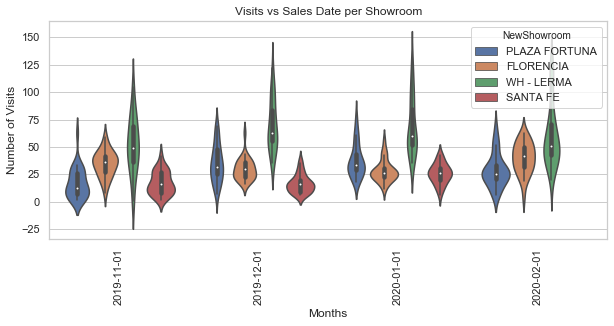

In [16]:
# Define figure size, create plot

WV1 = WV[(WV['NewShowroom']!="0") & (WV['NewShowroom']!="FUERA DE KAVAK") & (WV['Visits']>0) & (WV['my']>="2019-11-01") & (WV['my']<"2020-03-01")]
order = WV1.groupby('my')['Visits'].quantile(0.75).sort_values(ascending=True).iloc[::1].index

fig, ax = plt.subplots(figsize=(10,4))
m = sns.violinplot(x="my",y="Visits",hue="NewShowroom",data=WV1,orient='vertical',showfliers=False, order = order )
#a=('2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01')
a=('2019-11-01','2019-12-01','2020-01-01','2020-02-01')

# Format plot
plt.title('Visits vs Sales Date per Showroom')
plt.xticks(rotation=90);
#n.set(xticklabels=a)
plt.xticks(np.arange(4), a)
plt.xlabel('Months')
plt.ylabel('Number of Visits');

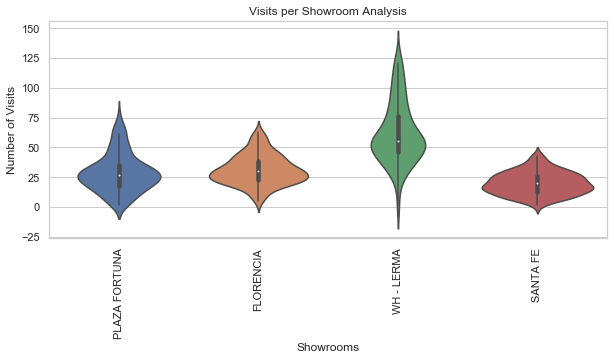

In [17]:
# Define figure size, create plot

WV1 = WV.drop(WV[(WV['NewShowroom']=="FUERA DE KAVAK") & (WV['my']>="2019-11-01")].index)
WV1 = WV[(WV['NewShowroom']!="0") & (WV['NewShowroom']!="FUERA DE KAVAK") & (WV['my']>="2019-11-01") & (WV['my']<="2020-03-01")]

fig, ax = plt.subplots(figsize=(10,4))
m = sns.violinplot(x="NewShowroom",y="Visits",data=WV1,orient='vertical',showfliers=False)
a=('2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01')

# Format plot
plt.title('Visits per Showroom Analysis')
plt.xticks(rotation=90);
#n.set(xticklabels=a)
#plt.xticks(np.arange(8), a)
plt.xlabel('Showrooms')
plt.ylabel('Number of Visits');

In [111]:
SS.head()

,item,LOCATION,LUGAR.DE.VENTA,stock_id,internal_id,marca,YEAR,km,sku,color,...,my,tot_pageviews,avg_pageviews,wopv,log_tot_pageviews,sold,inventory_days,tot_visits,avg_visits,log_inventory_days
0,AUTO 16420 ENTREGADO - Hyundai Grand i10 2016 ...,ENTREGADO - 7 DIAS,FLORENCIA,16420,6689035,Hyundai,2004,34572,H19P160210,NARANJA,...,2019-11-01,0,0.0,0,-inf,1,20,873,NaN,2.995732
1,AUTO 18032 ENTREGADO - Nissan March 2016 - 275...,ENTREGADO - 7 DIAS,FLORENCIA,18032,7874212,Nissan,2009,25445,N32P160109,NEGRO,...,2020-02-01,1001,858.0,1,6.908755,0,60,1774,1274.0,4.094345
2,AUTO 17849 ENTREGADO - Ford Fiesta 2017 - 2747897,ENTREGADO - 7 DIAS,FLORENCIA,17849,6813707,Ford,2004,10558,F13P170802,AZUL BRILLANTE,...,2020-01-01,221,201.0,1,5.398163,1,20,672,359.0,2.995732
3,AUTO 15863 ENTREGADO - Dodge Neon 2017 - 2657111,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,15863,6620580,Dodge,2009,24000,D10P171203,GRANITO,...,2019-11-01,0,0.0,0,-inf,1,20,752,NaN,2.995732
4,AUTO 16307 ENTREGADO - Smart Smart 2015 - 2677886,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,16307,6675592,Smart,2008,14658,S47P150103,NEGRO,...,2019-11-01,0,0.0,0,-inf,1,20,784,NaN,2.995732


In [18]:
### Sold before 60 days ###

SS['sold']=99
SS['inventory_days']=99

for indice_fila, fila in SS.iterrows():
    a=int(SS.loc[indice_fila,'dias_de_inventario'])
    if a<=60:
        SS.loc[indice_fila,'sold']=1
        SS.loc[indice_fila,'inventory_days']=a
    else:
        SS.loc[indice_fila,'sold']=0
        SS.loc[indice_fila,'inventory_days']=60
        

In [19]:
import datetime
SS['tot_visits']=0
SS['avg_visits']=0

### Sum total visits per car ###

for indice_fila, fila in SS.iterrows():
    #b=SS['salesdatetime'].iloc[fila]
    lastdate=SS.loc[indice_fila,'salesdatetime']
    invdays=SS.loc[indice_fila,'dias_de_inventario']
    Showroom=SS.loc[indice_fila,'LUGAR.DE.VENTA']
    invdays=int(invdays)
    firstdate = lastdate-datetime.timedelta(days=invdays)
    if invdays>=60:
        invdays=60
    newlastday = firstdate+datetime.timedelta(days=invdays)
    visits = WV[(WV['wvdatetime']<=newlastday) & (WV['wvdatetime']>=firstdate) & (WV['NewShowroom']==Showroom)]
    value=visits['Visits'].sum()
    SS.loc[indice_fila,'tot_visits']=value
    
### Average visits per car ###

for indice_fila, fila in SS.iterrows():
    #b=SS['salesdatetime'].iloc[fila]
    lastdate=SS.loc[indice_fila,'salesdatetime']
    invdays=SS.loc[indice_fila,'dias_de_inventario']
    invdays=int(invdays)
    firstdate = lastdate-datetime.timedelta(days=invdays)
    if invdays>=60:
        invdays=60
    newlastday = firstdate+datetime.timedelta(days=invdays)
    visits = WV[(WV['wvdatetime']<=newlastday) & (WV['wvdatetime']>=firstdate) & (WV['NewShowroom']==Showroom)]
    value=visits['Visits'].mean()
    SS.loc[indice_fila,'avg_visits']=round(value*invdays,0)



In [112]:
SS.columns

Index(['item', 'LOCATION', 'LUGAR.DE.VENTA', 'stock_id', 'internal_id',
       'marca', 'YEAR', 'km', 'sku', 'color', 'fecha_venta', 'fecha_entrega',
       'DATE', 'version', 'tipo_oferta_aceptada', 'precio_de_compra',
       'precio_de_publicacion', 'price_segment', 'km_segment', 'model_segment',
       'maker_segment', 'Showroom id', 'dias_de_inventario', 'salesdatetime',
       'year', 'month', 'my', 'tot_pageviews', 'avg_pageviews', 'wopv',
       'log_tot_pageviews', 'sold', 'inventory_days', 'tot_visits',
       'avg_visits', 'log_inventory_days'],
      dtype='object')

In [20]:
SS.groupby(['price_segment']).describe()['precio_de_publicacion']

,count,mean,std,min,25%,50%,75%,max
price_segment,,,,,,,,
price segment 1,478.0,163816.991632,30257.011083,79999.0,139999.0,164999.0,189999.0,209999.0
price segment 2,491.0,268039.733198,37445.720862,212999.0,232999.0,267999.0,299999.0,339999.0
price segment 3,151.0,458502.311258,121713.700909,342999.0,373999.0,419999.0,506499.0,1054999.0


([<matplotlib.axis.XTick at 0x1364fb1a320>,
 <a list of 3 Text xticklabel objects>)

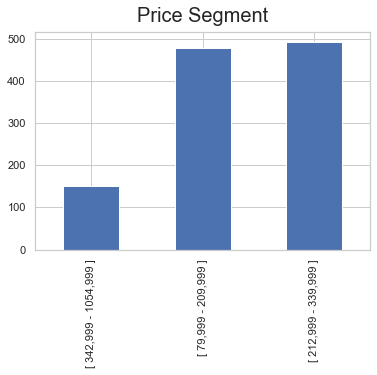

In [21]:
SS['price_segment'].value_counts().sort_values().plot.bar()
plt.title("Price Segment", fontsize=20, verticalalignment='bottom');

a=('[ 342,999 - 1054,999 ]','[ 79,999 - 209,999 ]','[ 212,999 - 339,999 ]',)
plt.xticks(np.arange(3), a)


In [22]:
SS.groupby(['km_segment']).describe()['km']

,count,mean,std,min,25%,50%,75%,max
km_segment,,,,,,,,
km segment 1,411.0,23683.267640,8610.561535,1050.0,18718.50,24442.0,31040.5,36300.0
km segment 2,434.0,49851.753456,8326.690848,36649.0,42349.25,49585.5,57142.0,64851.0
km segment 3,275.0,80858.050909,11516.439190,64965.0,72181.00,78641.0,87225.0,110900.0


([<matplotlib.axis.XTick at 0x1365244bf28>,
 <a list of 3 Text xticklabel objects>)

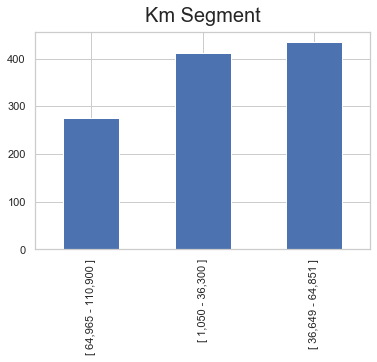

In [23]:

SS['km_segment'].value_counts().sort_values().plot.bar()
plt.title("Km Segment", fontsize=20, verticalalignment='bottom');

a=('[ 64,965 - 110,900 ]','[ 1,050 - 36,300 ]','[ 36,649 - 64,851 ]',)
plt.xticks(np.arange(3), a)


([<matplotlib.axis.XTick at 0x1365002de10>,
 <a list of 3 Text xticklabel objects>)

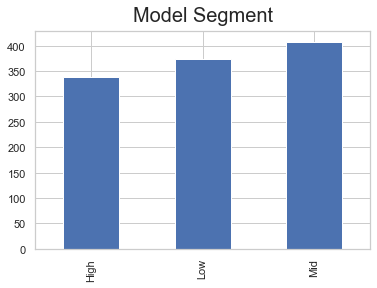

In [24]:
SS['model_segment'].value_counts().sort_values().plot.bar()
plt.title("Model Segment", fontsize=20, verticalalignment='bottom');

a=('High','Low','Mid')
plt.xticks(np.arange(3), a)



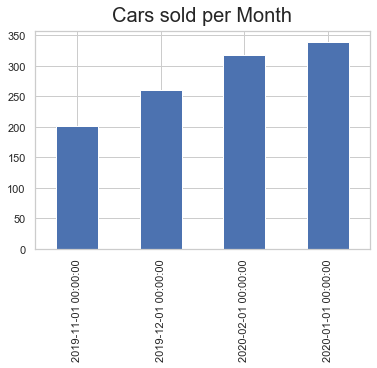

In [25]:
SS['my'].value_counts().sort_values().plot.bar()
plt.title("Cars sold per Month", fontsize=20, verticalalignment='bottom');


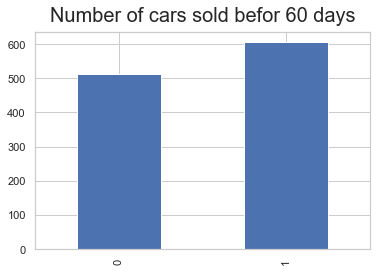

In [50]:
SS['sold'].value_counts().sort_values().plot.bar()
plt.title("Number of cars sold befor 60 days", fontsize=20, verticalalignment='bottom');

In [136]:
##Delete showroom equal to "FUERA DE KAVAK"
SS = SS.drop(SS[SS['LUGAR.DE.VENTA'].str.contains("FUERA")].index)

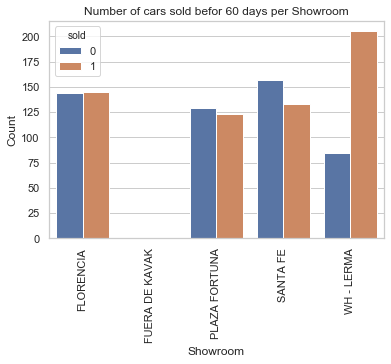

In [26]:
ax = sns.countplot(x="LUGAR.DE.VENTA", hue="sold", data=SS)
ax
# Format plot
plt.title('Number of cars sold befor 60 days per Showroom')
plt.xticks(rotation=90);
plt.xlabel('Showroom')
plt.ylabel('Count');

In [52]:
a = SS.groupby('wopv')['wopv'].count()
a

wopv
0    416
1    704
Name: wopv, dtype: int64

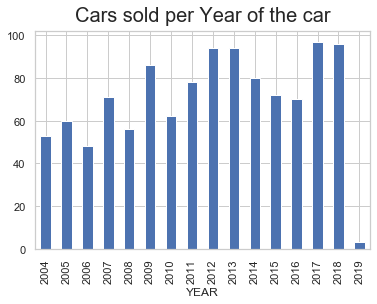

In [197]:
a = SS.groupby('YEAR').size()
a.plot.bar()
plt.title("Cars sold per Year of the car", fontsize=20, verticalalignment='bottom');

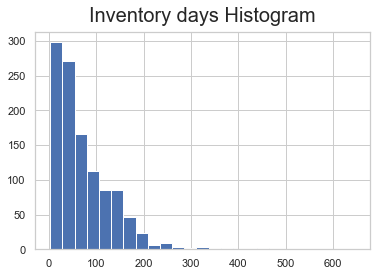

In [129]:
plt.hist(SS['dias_de_inventario'], bins=25);
plt.title("Inventory days Histogram", fontsize=20, verticalalignment='bottom');

In [ ]:
plt.hist(SS['dias_de_inventario'], bins=25);
plt.title("Inventory days Histogram", fontsize=20, verticalalignment='bottom');

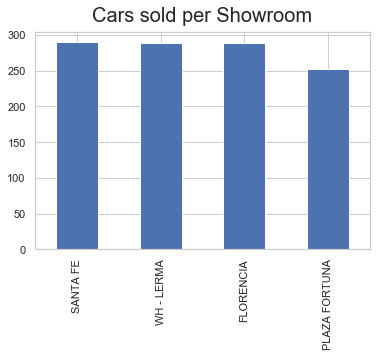

In [37]:
SS1 = SS[(SS['LUGAR.DE.VENTA']!="FUERA DE KAVAK  ")]
SS1['LUGAR.DE.VENTA'].value_counts().plot.bar()
plt.title("Cars sold per Showroom", fontsize=20, verticalalignment='bottom');

In [33]:
def remove_unused_categories(data):
    for cname in data:
        col = data[cname]
        if pd.api.types.is_categorical_dtype(col):
            SS[cname] = col.cat.remove_unused_categories()
    return data


remove_unused_categories(SS).head()

,item,LOCATION,LUGAR.DE.VENTA,stock_id,internal_id,marca,YEAR,km,sku,color,...,year,month,my,tot_pageviews,avg_pageviews,wopv,sold,inventory_days,tot_visits,avg_visits
0,AUTO 16420 ENTREGADO - Hyundai Grand i10 2016 ...,ENTREGADO - 7 DIAS,FLORENCIA,16420,6689035,Hyundai,2004,34572,H19P160210,NARANJA,...,2019,11,2019-11-01,0,0.0,0,1,20,873,NaN
1,AUTO 18032 ENTREGADO - Nissan March 2016 - 275...,ENTREGADO - 7 DIAS,FLORENCIA,18032,7874212,Nissan,2009,25445,N32P160109,NEGRO,...,2020,2,2020-02-01,1001,858.0,1,0,60,1774,1274.0
2,AUTO 17849 ENTREGADO - Ford Fiesta 2017 - 2747897,ENTREGADO - 7 DIAS,FLORENCIA,17849,6813707,Ford,2004,10558,F13P170802,AZUL BRILLANTE,...,2020,1,2020-01-01,221,201.0,1,1,20,672,359.0
3,AUTO 15863 ENTREGADO - Dodge Neon 2017 - 2657111,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,15863,6620580,Dodge,2009,24000,D10P171203,GRANITO,...,2019,11,2019-11-01,0,0.0,0,1,20,752,NaN
4,AUTO 16307 ENTREGADO - Smart Smart 2015 - 2677886,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,16307,6675592,Smart,2008,14658,S47P150103,NEGRO,...,2019,11,2019-11-01,0,0.0,0,1,20,784,NaN


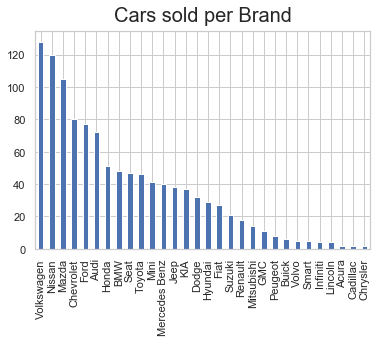

In [36]:
SS['marca'].value_counts().plot.bar()
plt.title("Cars sold per Brand", fontsize=20, verticalalignment='bottom');

In [56]:
SS['LUGAR.DE.VENTA'].unique()

[FLORENCIA, PLAZA FORTUNA, WH - LERMA, SANTA FE]
Categories (4, object): [FLORENCIA, PLAZA FORTUNA, WH - LERMA, SANTA FE]

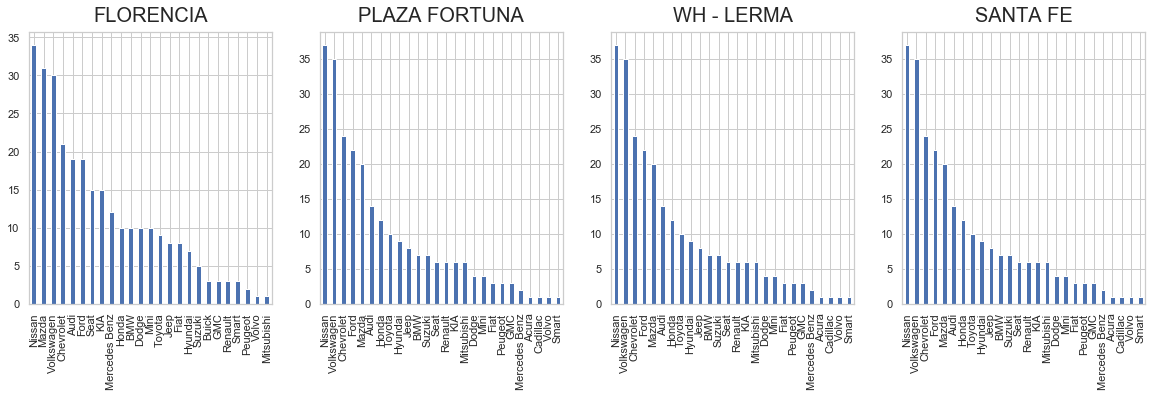

In [57]:
#####  Bar Graphs Brands per Showroom  #####

fig, axes = plt.subplots(figsize=(20,5))
plt.subplot(1,4,1)
SS3=SS[SS['LUGAR.DE.VENTA']=='FLORENCIA']
SS3['marca'].value_counts().plot.bar()
plt.title("FLORENCIA", fontsize=20, verticalalignment='bottom')

plt.subplot(1,4,2)
SS4=SS[SS['LUGAR.DE.VENTA']=='PLAZA FORTUNA']
SS4['marca'].value_counts().plot.bar()
plt.title("PLAZA FORTUNA", fontsize=20, verticalalignment='bottom')

plt.subplot(1,4,3)
SS5=SS[SS['LUGAR.DE.VENTA']=='WH - LERMA']
SS4['marca'].value_counts().plot.bar()
plt.title("WH - LERMA", fontsize=20, verticalalignment='bottom')

plt.subplot(1,4,4)
SS6=SS[SS['LUGAR.DE.VENTA']=='SANTA FE']
SS4['marca'].value_counts().plot.bar()
plt.title("SANTA FE", fontsize=20, verticalalignment='bottom');

In [58]:
SS.columns

Index(['item', 'LOCATION', 'LUGAR.DE.VENTA', 'stock_id', 'internal_id',
       'marca', 'YEAR', 'km', 'sku', 'color', 'fecha_venta', 'fecha_entrega',
       'DATE', 'version', 'tipo_oferta_aceptada', 'precio_de_compra',
       'precio_de_publicacion', 'price_segment', 'km_segment', 'model_segment',
       'maker_segment', 'Showroom id', 'dias_de_inventario', 'salesdatetime',
       'year', 'month', 'my', 'tot_pageviews', 'avg_pageviews', 'wopv',
       'log_tot_pageviews', 'sold', 'inventory_days', 'tot_visits',
       'avg_visits'],
      dtype='object')

In [59]:
corr_mat  = SS[['Showroom id', 'YEAR','km','my','precio_de_publicacion','dias_de_inventario','tot_pageviews','tot_visits']].corr()
corr_mat

,Showroom id,YEAR,km,precio_de_publicacion,dias_de_inventario,tot_pageviews,tot_visits
Showroom id,1.000000,-0.015960,-0.075001,0.204829,0.017180,0.015008,-0.177381
YEAR,-0.015960,1.000000,-0.028921,-0.040318,-0.001328,0.030763,0.078176
km,-0.075001,-0.028921,1.000000,-0.404860,0.000892,0.152696,0.110030
precio_de_publicacion,0.204829,-0.040318,-0.404860,1.000000,0.234832,-0.068198,-0.155920
dias_de_inventario,0.017180,-0.001328,0.000892,0.234832,1.000000,-0.167605,-0.185411
tot_pageviews,0.015008,0.030763,0.152696,-0.068198,-0.167605,1.000000,0.180073
tot_visits,-0.177381,0.078176,0.110030,-0.155920,-0.185411,0.180073,1.000000


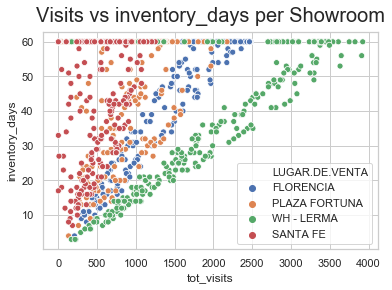

In [65]:
lm=sns.scatterplot(x='tot_visits', y='inventory_days',data=SS,hue="LUGAR.DE.VENTA")
plt.title("Visits vs inventory_days per Showroom", fontsize=20, verticalalignment='bottom');

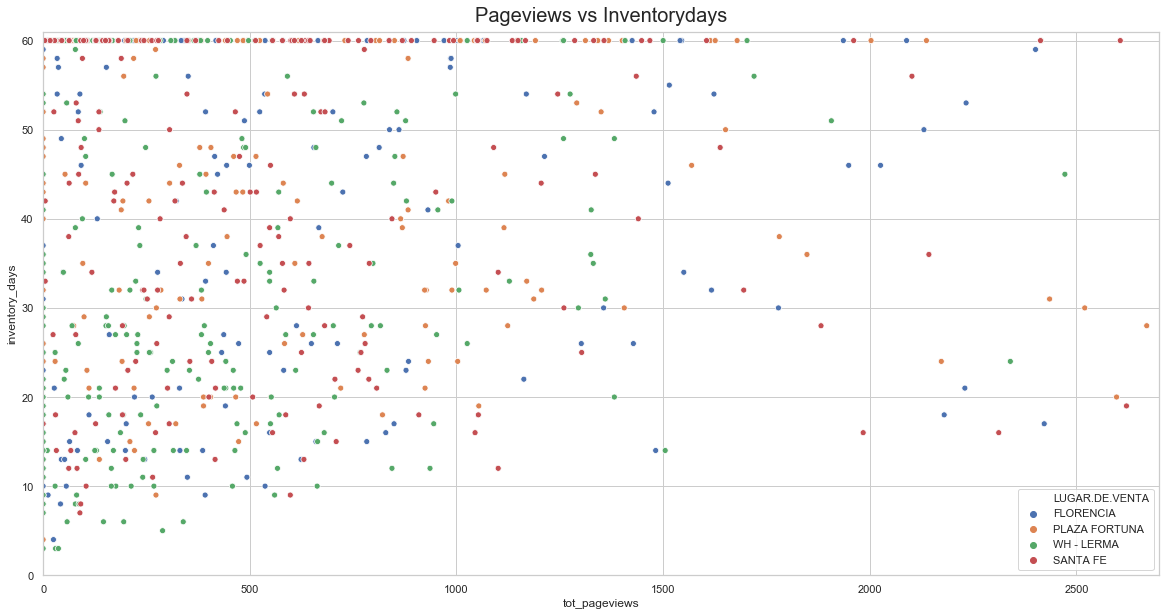

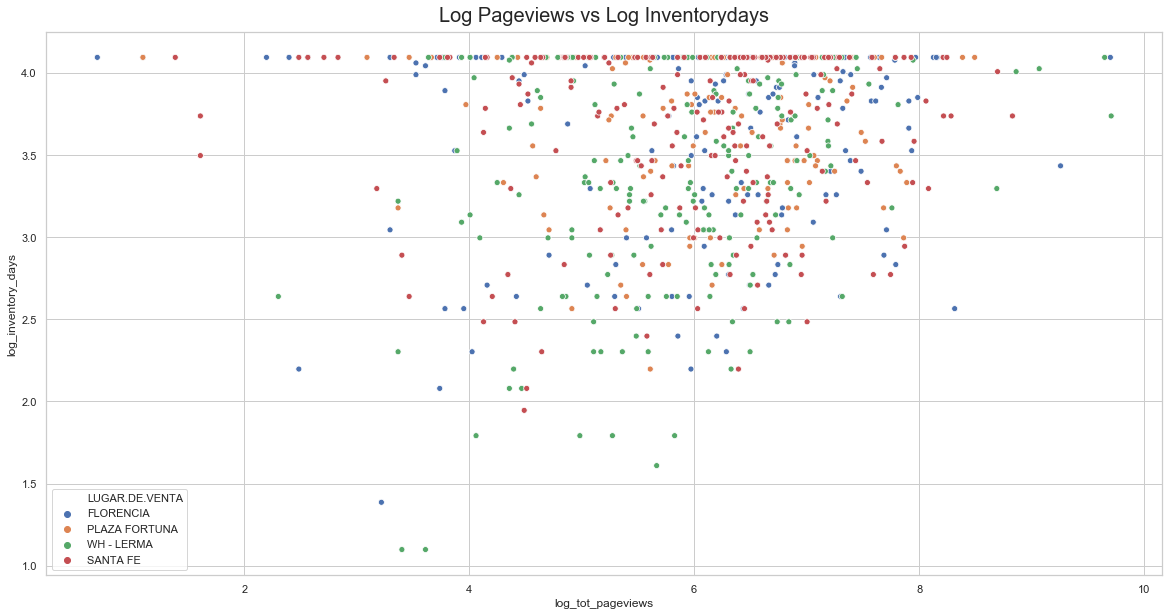

In [64]:
SS['log_tot_pageviews'] = SS['tot_pageviews'].apply(lambda x: np.log(x))
SS['log_inventory_days'] = SS['inventory_days'].apply(lambda x: np.log(x))

fig, ax = plt.subplots(figsize=(20,10))
lm=sns.scatterplot(x='tot_pageviews', y='inventory_days',data=SS, 
           hue="LUGAR.DE.VENTA")
axes= lm.axes
axes.set_xlim([0,2700])
axes.set_ylim([0,61])
plt.title("Pageviews vs Inventorydays", fontsize=20, verticalalignment='bottom');

fig, ax = plt.subplots(figsize=(20,10))
lm=sns.scatterplot(x='log_tot_pageviews', y='log_inventory_days',data=SS, 
           hue="LUGAR.DE.VENTA")
axes= lm.axes
plt.title("Log Pageviews vs Log Inventorydays", fontsize=20, verticalalignment='bottom');



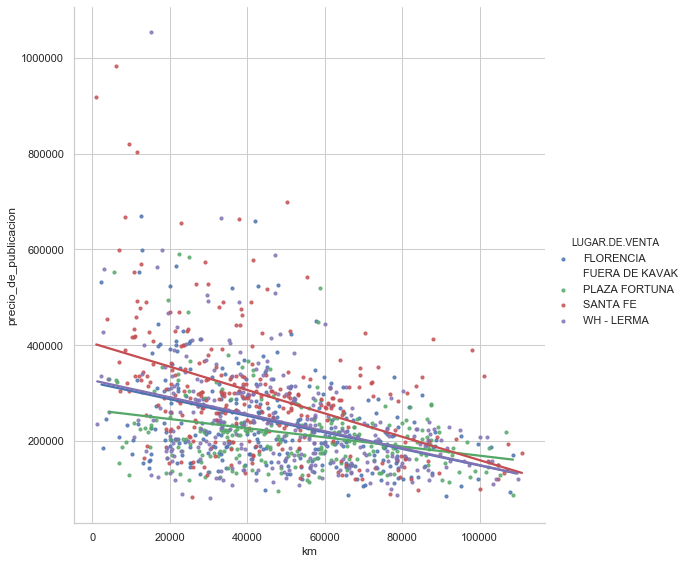

In [38]:
lm=sns.lmplot(x='km', y='precio_de_publicacion',data=SS, 
           hue="LUGAR.DE.VENTA", height=8, scatter_kws={"s": 10},sharex=False,sharey=False,ci=None)
axes= lm.axes


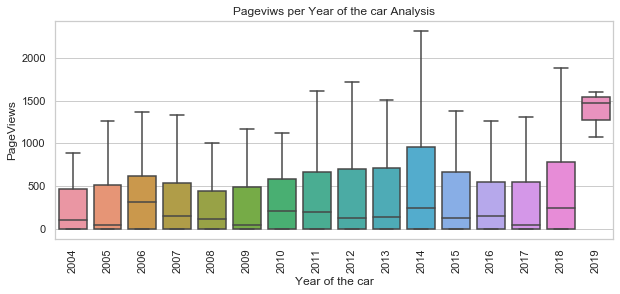

In [66]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="YEAR",y="tot_pageviews",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Pageviws per Year of the car Analysis')
plt.xticks(rotation=90);
plt.xlabel('Year of the car')
plt.ylabel('PageViews');

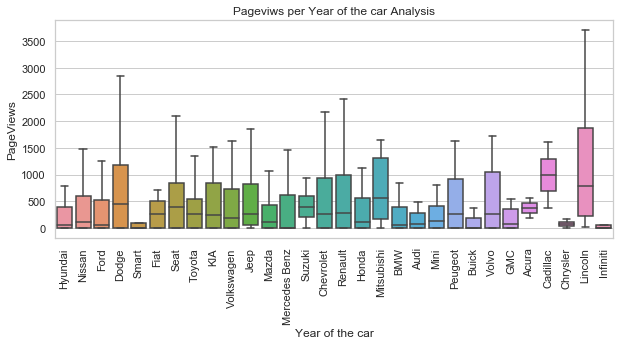

In [925]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="marca",y="tot_pageviews",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Pageviws per Brand Analysis')
plt.xticks(rotation=90);
plt.xlabel('Year of the car')
plt.ylabel('PageViews');

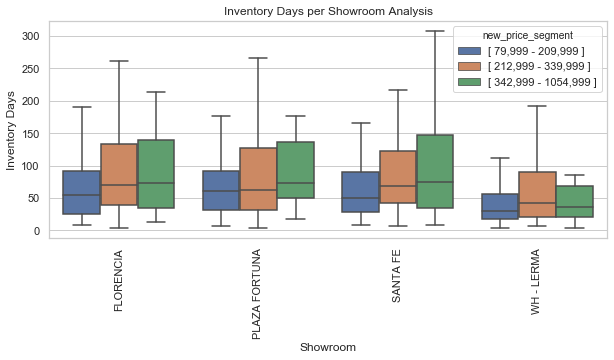

In [65]:
# Define figure size, create plot
SS1 = SS.drop(SS[SS['LUGAR.DE.VENTA']=="FUERA DE KAVAK"].index).copy()


fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="LUGAR.DE.VENTA",y="dias_de_inventario",hue="new_price_segment",data=SS1,orient='vertical',showfliers=False)

# Format plot
plt.title('Inventory Days per Showroom Analysis')
plt.xticks(rotation=90);
plt.xlabel('Showroom')
plt.ylabel('Inventory Days');

In [52]:
SS1.head()

,item,LOCATION,LUGAR.DE.VENTA,stock_id,internal_id,marca,YEAR,km,sku,color,...,month,my,tot_pageviews,avg_pageviews,wopv,sold,inventory_days,tot_visits,avg_visits,new_price_segment
0,AUTO 16420 ENTREGADO - Hyundai Grand i10 2016 ...,ENTREGADO - 7 DIAS,FLORENCIA,16420,6689035,Hyundai,2004,34572,H19P160210,NARANJA,...,11,2019-11-01,0,0.0,0,1,20,873,NaN,price segment 1
1,AUTO 18032 ENTREGADO - Nissan March 2016 - 275...,ENTREGADO - 7 DIAS,FLORENCIA,18032,7874212,Nissan,2009,25445,N32P160109,NEGRO,...,2,2020-02-01,1001,858.0,1,0,60,1774,1274.0,price segment 1
2,AUTO 17849 ENTREGADO - Ford Fiesta 2017 - 2747897,ENTREGADO - 7 DIAS,FLORENCIA,17849,6813707,Ford,2004,10558,F13P170802,AZUL BRILLANTE,...,1,2020-01-01,221,201.0,1,1,20,672,359.0,price segment 1
3,AUTO 15863 ENTREGADO - Dodge Neon 2017 - 2657111,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,15863,6620580,Dodge,2009,24000,D10P171203,GRANITO,...,11,2019-11-01,0,0.0,0,1,20,752,NaN,price segment 1
4,AUTO 16307 ENTREGADO - Smart Smart 2015 - 2677886,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,16307,6675592,Smart,2008,14658,S47P150103,NEGRO,...,11,2019-11-01,0,0.0,0,1,20,784,NaN,price segment 1


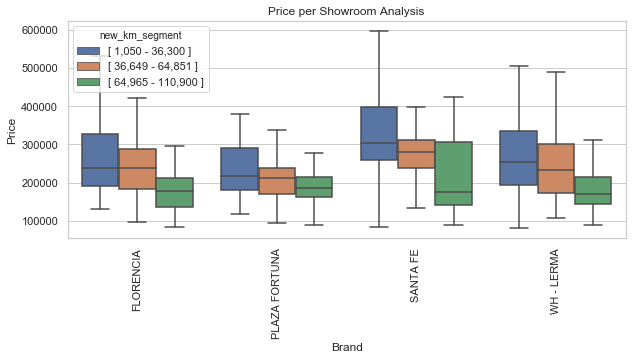

In [66]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="LUGAR.DE.VENTA",y="precio_de_publicacion",hue="new_km_segment",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Price per Showroom Analysis')
plt.xticks(rotation=90);
plt.xlabel('Brand')
plt.ylabel('Price');

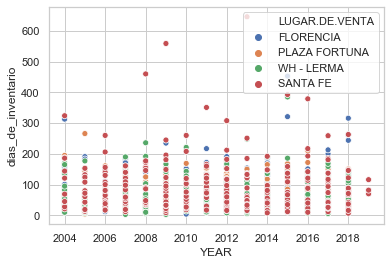

In [358]:
lm=sns.scatterplot(x='YEAR', y='dias_de_inventario',data=SS, 
           hue="LUGAR.DE.VENTA")
axes= lm.axes

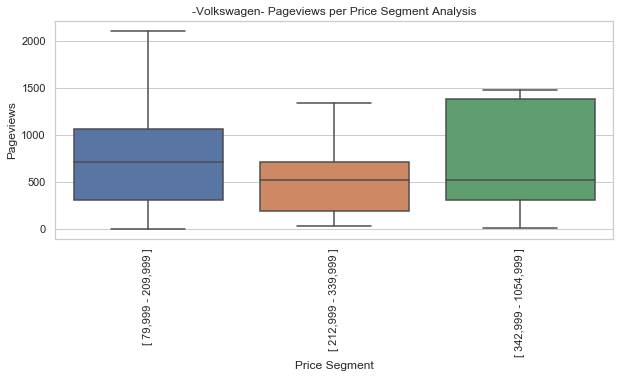

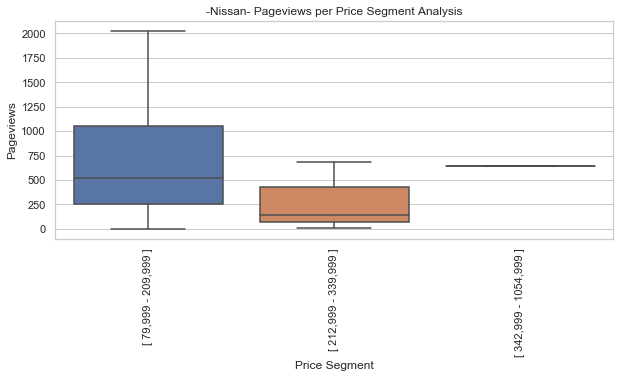

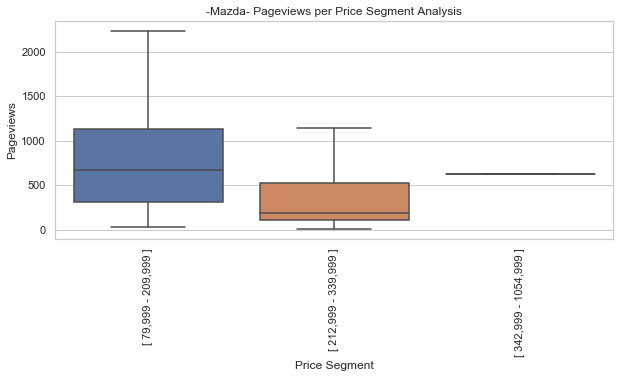

In [67]:
SS7=SS[(SS['marca']=='Volkswagen') & (SS['tot_pageviews']>0) ]
SS8=SS[(SS['marca']=='Nissan')  & (SS['tot_pageviews']>0)]
SS9=SS[(SS['marca']=='Mazda')  & (SS['tot_pageviews']>0)]

# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="new_price_segment",y="tot_pageviews",data=SS7,orient='vertical',showfliers=False)

# Format plot
plt.title('-Volkswagen- Pageviews per Price Segment Analysis')
plt.xticks(rotation=90);
plt.xlabel('Price Segment')
plt.ylabel('Pageviews');

# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="new_price_segment",y="tot_pageviews",data=SS8,orient='vertical',showfliers=False)

# Format plot
plt.title('-Nissan- Pageviews per Price Segment Analysis')
plt.xticks(rotation=90);
plt.xlabel('Price Segment')
plt.ylabel('Pageviews');


# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="new_price_segment",y="tot_pageviews",data=SS9,orient='vertical',showfliers=False)

# Format plot
plt.title('-Mazda- Pageviews per Price Segment Analysis')
plt.xticks(rotation=90);
plt.xlabel('Price Segment')
plt.ylabel('Pageviews');

Text(0.5, 1.0, 'Inventory days vs price of the car Analysis')

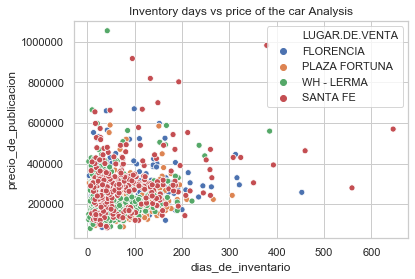

In [68]:
SS7=SS[SS['marca']=='Volkswagen']
lm=sns.scatterplot(x='dias_de_inventario', y='precio_de_publicacion',data=SS, 
           hue="LUGAR.DE.VENTA")
axes= lm.axes
plt.title('Inventory days vs price of the car Analysis')

In [355]:
# Tabla de contingencia class / survived
pd.crosstab(index=SS['YEAR'],
            columns=SS['LUGAR.DE.VENTA']).apply(lambda r: r/r.sum() *100,
                                axis=0)

LUGAR.DE.VENTA,FLORENCIA,PLAZA FORTUNA,SANTA FE,WH - LERMA
YEAR,,,,
2004,4.844291,4.761905,3.103448,6.228374
2005,3.806228,7.936508,5.172414,4.844291
2006,3.806228,3.571429,7.241379,2.422145
2007,7.266436,6.746032,6.206897,5.190311
2008,4.498270,3.571429,5.172414,6.574394
2009,8.304498,5.952381,8.965517,7.266436
2010,5.190311,3.571429,7.931034,5.190311
2011,7.612457,8.730159,5.172414,6.574394
2012,8.304498,9.523810,8.275862,7.612457


In [354]:
# Tabla de contingencia class / survived
pd.crosstab(index=SS['marca'],
            columns=SS['LUGAR.DE.VENTA']).apply(lambda r: r/r.sum() *100,
                                axis=0)


LUGAR.DE.VENTA,FLORENCIA,PLAZA FORTUNA,SANTA FE,WH - LERMA
marca,,,,
Acura,0.000000,0.396825,0.344828,0.000000
Audi,6.574394,5.555556,7.586207,5.882353
BMW,3.460208,2.777778,7.241379,3.460208
Buick,1.038062,0.000000,0.689655,0.346021
Cadillac,0.000000,0.396825,0.344828,0.000000
Chevrolet,7.266436,9.523810,3.448276,8.650519
Chrysler,0.000000,0.000000,0.344828,0.346021
Dodge,3.460208,1.587302,3.448276,2.768166
Fiat,2.768166,1.190476,3.448276,2.076125


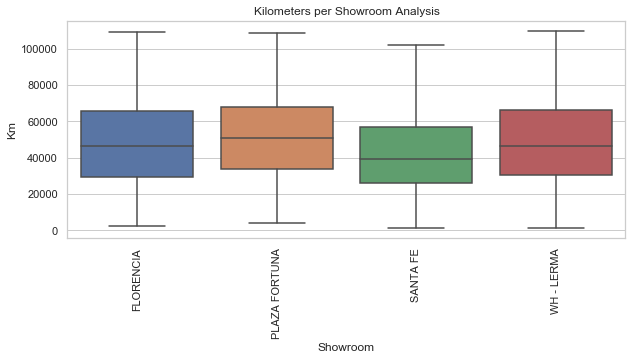

In [69]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="LUGAR.DE.VENTA",y="km",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Kilometers per Showroom Analysis')
plt.xticks(rotation=90);
plt.xlabel('Showroom')
plt.ylabel('Km');

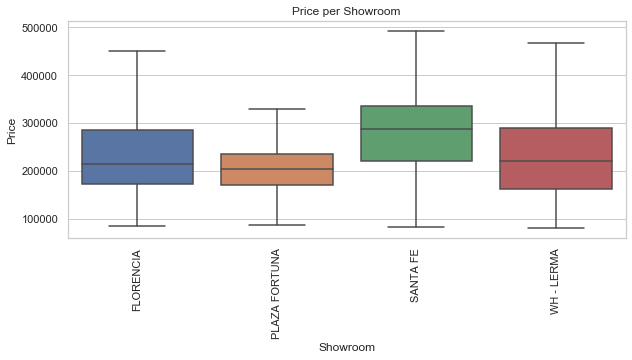

In [70]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="LUGAR.DE.VENTA",y="precio_de_publicacion",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Price per Showroom')
plt.xticks(rotation=90);
plt.xlabel('Showroom')
plt.ylabel('Price');

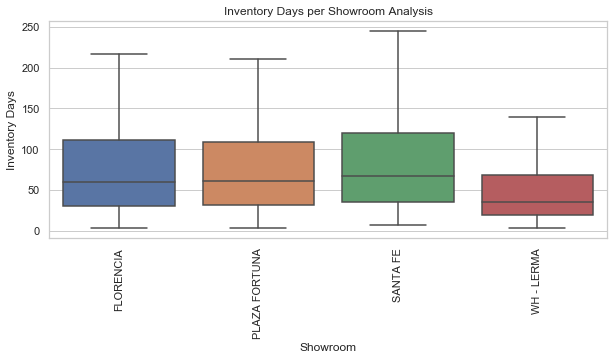

In [71]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(10,4))
m = sns.boxplot(x="LUGAR.DE.VENTA",y="dias_de_inventario",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Inventory Days per Showroom Analysis')
plt.xticks(rotation=90);
plt.xlabel('Showroom')
plt.ylabel('Inventory Days');

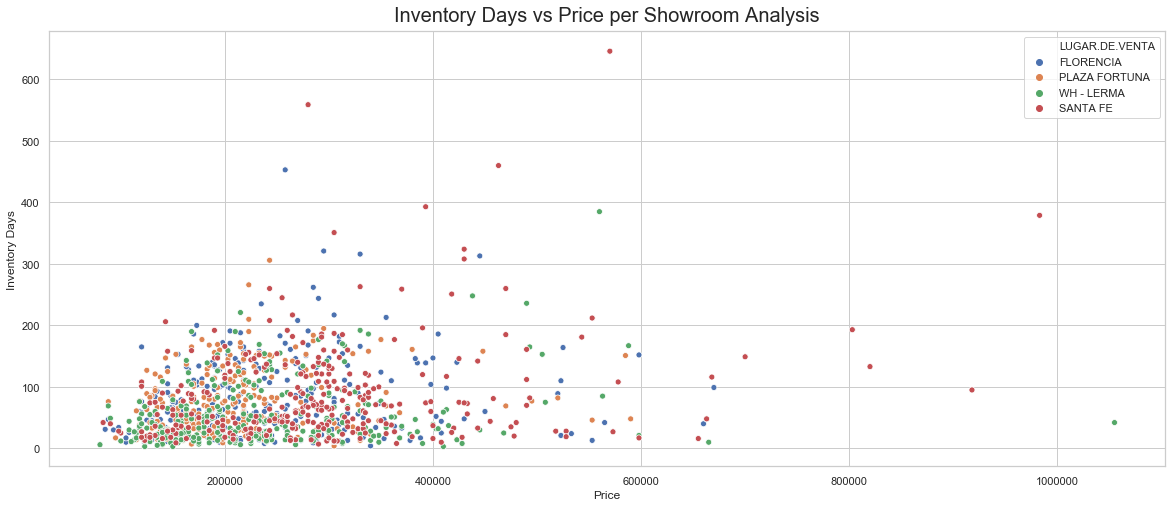

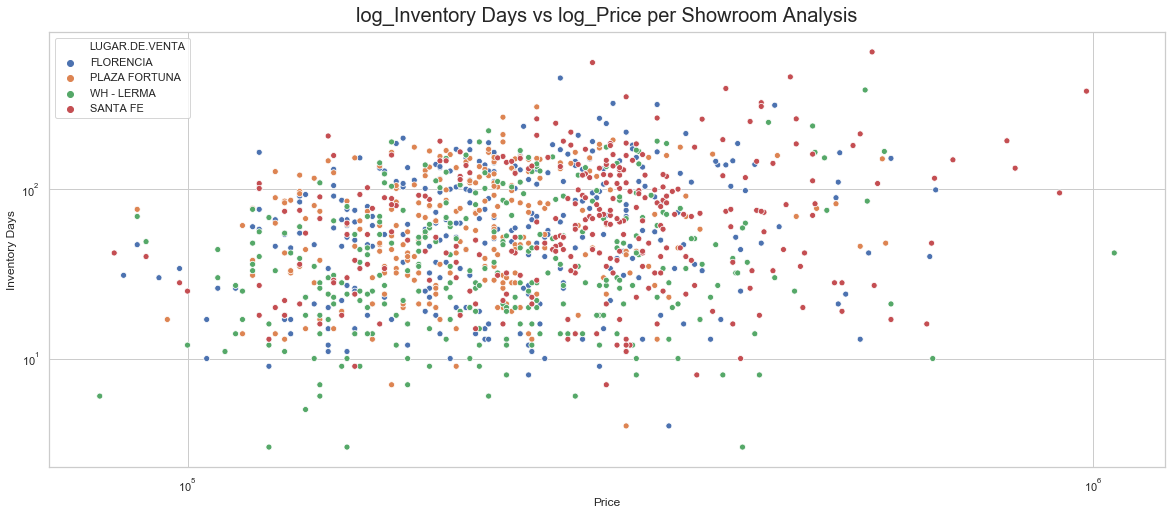

In [81]:
fig, ax = plt.subplots(figsize=(20,8))
lm=sns.scatterplot(x='precio_de_publicacion', y='dias_de_inventario',data=SS, 
           hue="LUGAR.DE.VENTA")
axes= lm.axes
plt.title('Inventory Days vs Price per Showroom Analysis', fontsize=20, verticalalignment='bottom')
plt.xlabel('Price')
plt.ylabel('Inventory Days');


fig, ax = plt.subplots(figsize=(20,8))
lm=sns.scatterplot(x='precio_de_publicacion', y='dias_de_inventario',data=SS, 
           hue="LUGAR.DE.VENTA")
axes= lm.axes
ax.set_xscale('log')
ax.set_yscale('log')
plt.title('log_Inventory Days vs log_Price per Showroom Analysis', fontsize=20, verticalalignment='bottom')
plt.xlabel('Price')
plt.ylabel('Inventory Days');

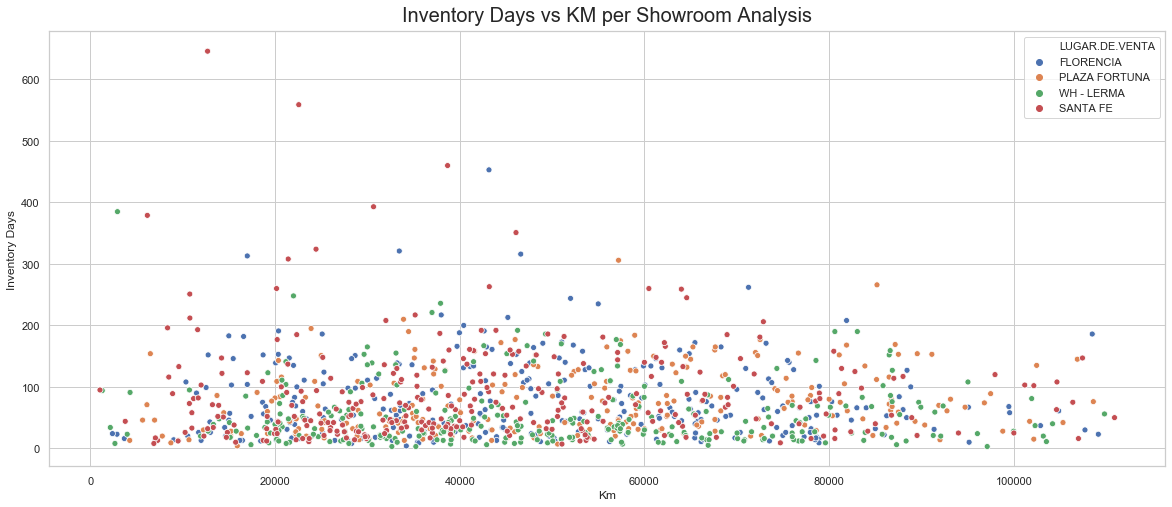

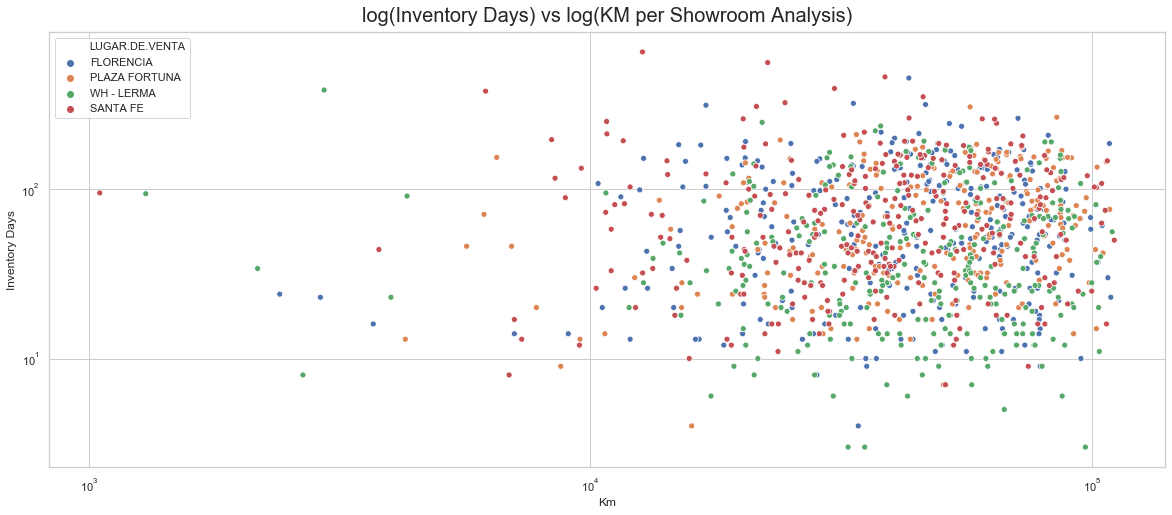

In [78]:
fig, ax = plt.subplots(figsize=(20,8))
lm=sns.scatterplot(x='km', y='dias_de_inventario',data=SS, 
           hue="LUGAR.DE.VENTA")
axes= lm.axes
plt.title('Inventory Days vs KM per Showroom Analysis', fontsize=20, verticalalignment='bottom')
plt.xlabel('Km')
plt.ylabel('Inventory Days');


fig, ax = plt.subplots(figsize=(20,8))
lm=sns.scatterplot(x='km', y='dias_de_inventario',data=SS, 
           hue="LUGAR.DE.VENTA")
axes= lm.axes
ax.set_xscale('log')
ax.set_yscale('log')
plt.title('log(Inventory Days) vs log(KM per Showroom Analysis)', fontsize=20, verticalalignment='bottom')
plt.xlabel('Km')
plt.ylabel('Inventory Days');

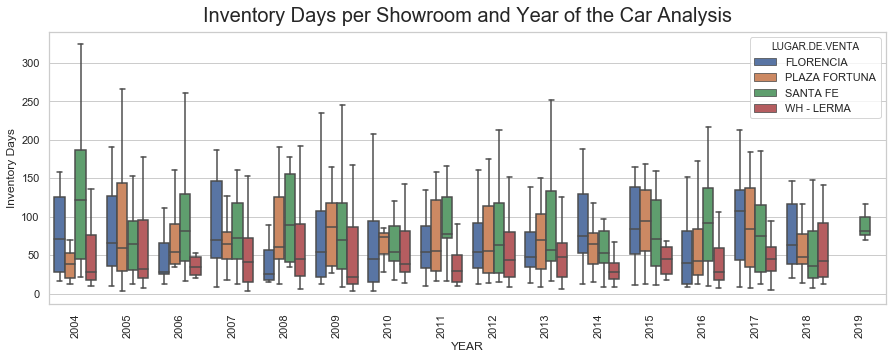

In [76]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(15,5))
m = sns.boxplot(x="YEAR",y="dias_de_inventario",hue="LUGAR.DE.VENTA",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Inventory Days per Showroom and Year of the Car Analysis', fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);
plt.xlabel('YEAR')
plt.ylabel('Inventory Days');

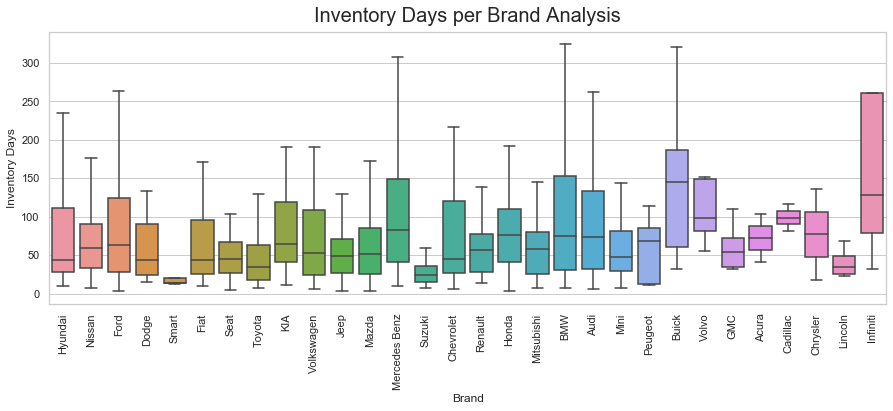

In [83]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(15,5))
m = sns.boxplot(x="marca",y="dias_de_inventario",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Inventory Days per Brand Analysis', fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);
plt.xlabel('Brand')
plt.ylabel('Inventory Days');

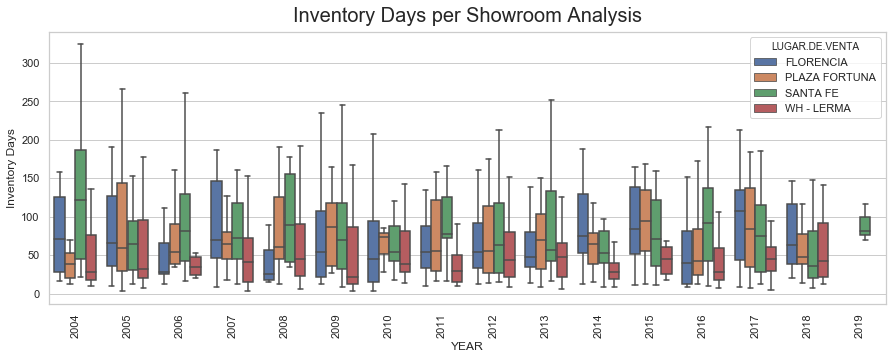

In [74]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(15,5))
m = sns.boxplot(x="YEAR",y="dias_de_inventario",hue="LUGAR.DE.VENTA",data=SS,orient='vertical',showfliers=False)

# Format plot
plt.title('Inventory Days per Showroom Analysis', fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);
plt.xlabel('YEAR')
plt.ylabel('Inventory Days');

In [32]:
SS.columns

Index(['item', 'LOCATION', 'LUGAR.DE.VENTA', 'stock_id', 'internal_id',
       'marca', 'YEAR', 'km', 'sku', 'color', 'fecha_venta', 'fecha_entrega',
       'DATE', 'version', 'tipo_oferta_aceptada', 'precio_de_compra',
       'precio_de_publicacion', 'price_segment', 'km_segment', 'model_segment',
       'maker_segment', 'Showroom id', 'dias_de_inventario', 'salesdatetime',
       'year', 'month', 'my'],
      dtype='object')